In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download atharvaingle/crop-recommendation-dataset

  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 30.9MB/s]


In [6]:
!unzip crop-recommendation-dataset.zip

Archive:  crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


### Import Dataset

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv("Crop_recommendation.csv")

In [9]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [10]:
data.shape

(2200, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
data.isnull().count()

N              2200
P              2200
K              2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label          2200
dtype: int64

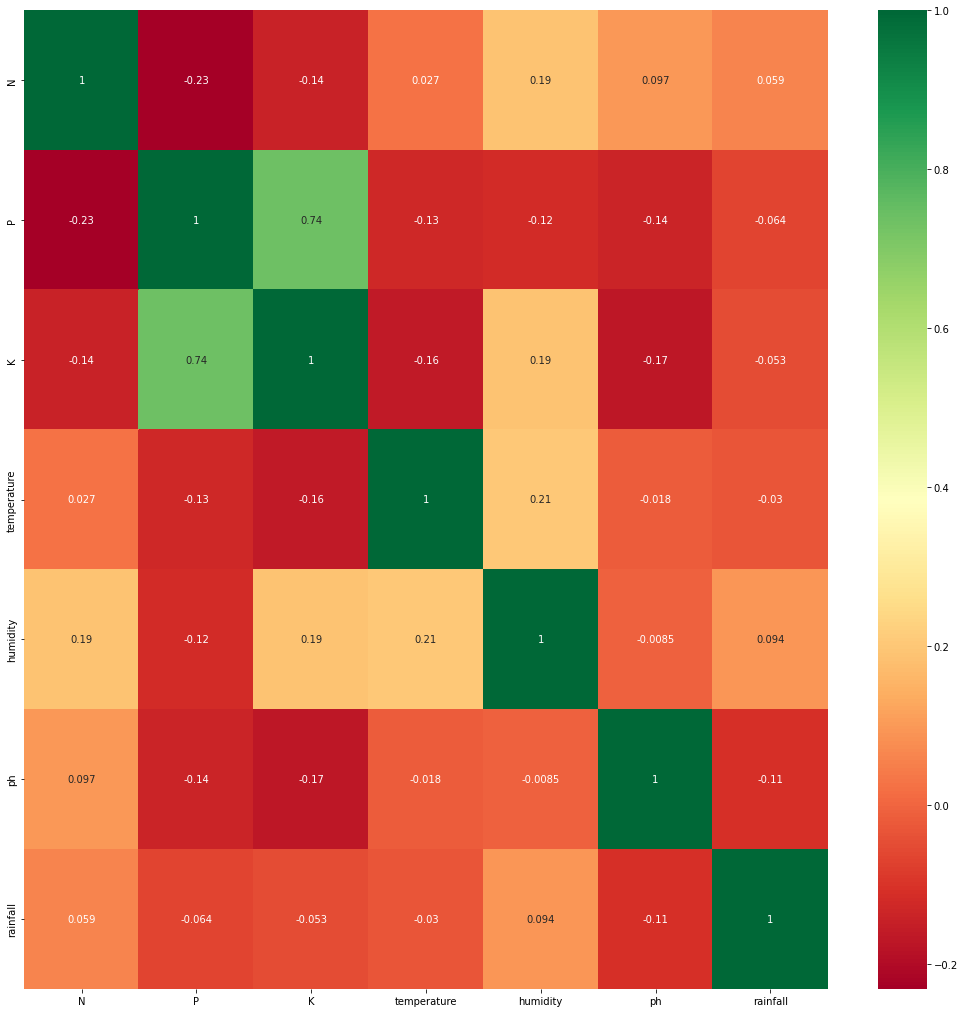

In [14]:
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [15]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [16]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [17]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['label']= label_encoder.fit_transform(data['label'])
  
data['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [18]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [19]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [20]:
X = data.loc[:, ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [21]:
y = data.iloc[:, 7]
y.head()

0    20
1    20
2    20
3    20
4    20
Name: label, dtype: int64

In [22]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

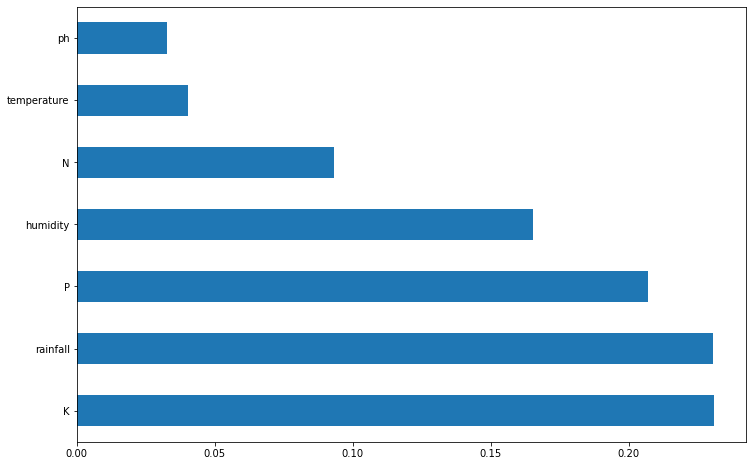

In [23]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='barh')
plt.show()

## Model Training

In [27]:
from sklearn.model_selection import train_test_split

#split the dataset in train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=7)

In [28]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
653,21,44,18,27.069100,86.899341,7.128511,50.467461
1667,36,29,13,20.681852,90.915105,7.829507,109.751393
1369,113,19,46,25.418640,81.121230,6.286388,49.523207
1351,90,16,45,24.920933,80.617508,6.291540,50.557108
957,12,20,39,19.861736,86.197409,6.026999,111.021793
...,...,...,...,...,...,...,...
211,43,66,79,19.462340,15.225390,7.976608,74.585651
1603,7,16,9,18.879577,92.043045,7.813917,114.665951
537,17,57,20,28.506779,45.200945,3.793575,66.176146
1220,39,145,201,36.731266,80.589319,5.775600,72.242308


In [29]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1849,34,15,34,27.058265,91.105104,5.677283,224.700695
7,94,53,40,20.277744,82.894086,5.718627,241.974195
1963,112,49,25,25.689595,77.906210,6.470135,66.194268
237,49,55,78,18.655801,16.177727,7.863114,81.707693
717,50,58,23,27.813269,62.504605,7.596802,69.755555
...,...,...,...,...,...,...,...
737,57,60,17,26.237731,67.885214,7.504608,73.586640
1825,36,27,26,26.584139,95.789231,6.254496,171.626230
1123,28,37,28,32.134097,50.525591,6.097870,98.633337
298,40,58,75,18.591908,14.779596,7.168096,89.609825


In [30]:
y_train

653     14
1667    16
1369    21
1351    21
957     19
        ..
211      3
1603    16
537     13
1220     7
175     11
Name: label, Length: 1760, dtype: int64

In [31]:
y_test

1849     4
7       20
1963     6
237      3
717      2
        ..
737      2
1825     4
1123    12
298      3
513     13
Name: label, Length: 440, dtype: int64

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [36]:
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(GaussianNB())

In [40]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
model_list = ['Logistic Regression', 'Desicion Tree', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes']
acc_list = []

for model in model_pipeline:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc_list.append(metrics.accuracy_score(y_test, y_pred))

In [48]:
result = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list})
result

,Model,Accuracy
0,Logistic Regression,0.961364
1,Desicion Tree,0.988636
2,Random Forest,0.995455
3,SVM,0.984091
4,KNN,0.984091
5,Naive Bayes,1.000000


## **Naive Bayes Model has the best accuracy: 100%**